# Flight Fare Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder



from scipy import stats
sns.set()

In [2]:
#importing the economoy class saved dataset
df2=pd.read_csv("C:/Users/Aaryaa/Desktop/Project 3/economy_class")

In [3]:
#haed of the economy class dataset
df2.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,3.774736,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,3.774736,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,3.774955,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,3.774882,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,3.774882,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [4]:
#Shape of the Economy class data
df2.shape

(206666, 30)

In [5]:
#separating the independent and dependent variables
X2=df2.drop('price',axis=1)
y2=df2['price']

In [6]:
#Shape of independent and dependent variable on the basis of economy class 
X2.shape,y2.shape

((206666, 29), (206666,))

# Modeling for Economy Class:

In [7]:
#Spliting into trainning and test data
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)
     

In [8]:
print('\n Shape of X2_train set is:',X2_train.shape,'\n','Shape of X2_test set is:', X2_test.shape, '\n','Shape of y2_train set is:',y2_train.shape,'\n','Shape of y2_test set is:',y2_test.shape)


 Shape of X2_train set is: (165332, 29) 
 Shape of X2_test set is: (41334, 29) 
 Shape of y2_train set is: (165332,) 
 Shape of y2_test set is: (41334,)


<H3>1. Multiple Linear Regression Model</H3>

In [9]:
# Training the Model
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X2_train, y2_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
y_pred1 = regressor1.predict(X2_test)
r2_mlr=r2_score(y2_test, y_pred1)
print("R2 :" ,r2_mlr)
print("Adjusted R2 : ",1-(1-r2_score((y2_test), (y_pred1)))*((X2_test.shape[0]-1)/(X2_test.shape[0]-X2_test.shape[1]-1)))

R2 : 0.5902071689862649
Adjusted R2 :  0.5899194488598994


In [11]:
residuals1=y2_test-y_pred1

 <B><H2>Checking the Assumptions of the Linear Regressions:</B></H2>
    <B><H3>a. Homoscedasticity:</B></H3>

* Heteroskedasticity refers to situations where the variance of the residuals is unequal over a range of measured values.
* When running a regression analysis, heteroskedasticity results in an unequal scatter of the residuals.
* A residual vs fitted plot can be used to assess whether data is homoscedatic in nature or not.
* Goldfeld-Quandt Test can also be used to assess the same.

<B> Goldfeld Quandt Test:</B>

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [12]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [13]:
import statsmodels.api as sm

#define predictor and response variables

#add constant to predictor variables
X2_test_constant = sm.add_constant(X2_test)

#fit linear regression model
model = sm.OLS(residuals1,X2_test_constant).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.391
Date:                Fri, 29 Dec 2023   Prob (F-statistic):             0.0818
Time:                        18:36:18   Log-Likelihood:                 20828.
No. Observations:               41334   AIC:                        -4.160e+04
Df Residuals:                   41305   BIC:                        -4.135e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [14]:
#perform Goldfeld-Quandt test
sm.stats.diagnostic.het_goldfeldquandt(residuals1,X2_test, drop=0.2)


(0.9840154562477058, 0.8423417808900671, 'increasing')

So, As the P-value is greater than 0.05 and also the F statistic is less than Critical F value,we fail to reject the null hypothesis that means we accept the null hypothesis .So,we can conclude that that the residuals are homoscedastic in nature.

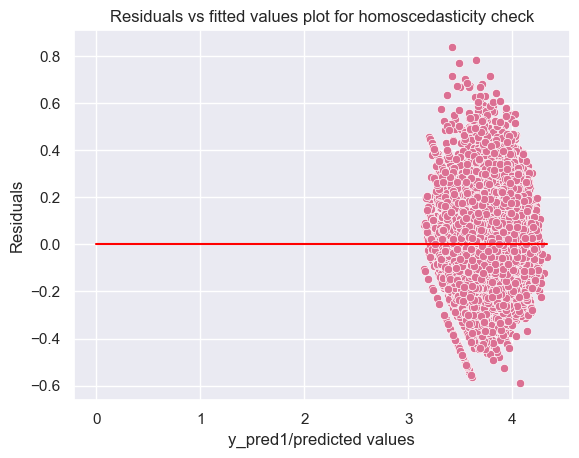

In [54]:
p = sns.scatterplot(x=(y_pred1),y=residuals1,color='palevioletred')
plt.xlabel('y_pred1/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,max(y_pred1)],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<B>b. Durbin-Watson Test for testing the Auto Correlation </B>

* Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
* Autocorrelation measures the relationship between a variable's current value and its past values.
* We use Durbin Watson test to measure the degree of autocorrelation.
* The Durbin Watson test reports a test statistic, with a value from 0 to 4, where: * 2 is no autocorrelation. * Less than 2 is positive autocorrelation (common in time series data). * Greater than 2 is negative autocorrelation (less common in time series data)

* A residual vs fitted plot can also be used to assess the autocorrelation in the data.


In [16]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels
statsmodels.stats.stattools.durbin_watson(residuals1)

1.9861197592609183

The value of Durbin-Watson Test Statistics is 1.986, which is very close to 2. Therefore we can conclude that, there is a very insignificant amount of negative correlation present in the data.

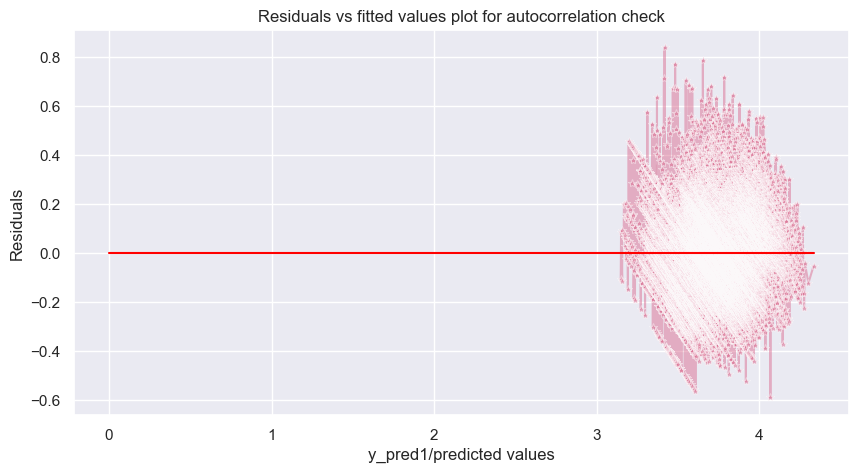

In [57]:
#Residual plot for autocorrelation check
plt.figure(figsize=(10,5))
p = sns.lineplot(x=(y_pred1),y=residuals1,marker='*',color='palevioletred',alpha=0.5)
sns.color_palette("Paired")
plt.xlabel('y_pred1/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,max(y_pred1)],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')


<B>c) Multicolinearity:</B>

* Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

* To measure multicollinearity among the independent features, we use VIF (Variance Inflation Factor).

* If VIF< 4 then, No Multicolinearity present.

  If VIF>= 4 then, Moderate Multicolinearity present.

  If VIF>10 then, Severe Multicolinearity present.

In [18]:
df=pd.read_csv("C:/Users/Aaryaa/Desktop/Project 3/clean_df")
X = df.drop('price',axis=1) # Independent Variable
y = df['price']# Dependent Variable


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X1):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
calc_vif(X[[i for i in X.describe().columns]]) 

,variables,VIF
0,stops,8.088885
1,class,1.832490
2,duration,6.819045
3,days_left,4.356119
4,airline_Air_India,5.381777
5,airline_GO_FIRST,1.951309
6,airline_Indigo,2.700876
7,airline_SpiceJet,1.434112
8,airline_Vistara,7.711505
9,source_city_Chennai,1.722903


So, here we have a moderate Multicolinearity present in 'stops','duration','days_left','airline_Air_India', and 'airline_Vistara' variables. This could be a result of sample regression phenomenon of multicolinearity, which means even if X variables are not linearly related in population , they may be related in the sample in hand as we have only 300153 observations in our dataset.

Since the features 'stops','duration','days_left','airline_Air_India', and 'airline_Vistara' are very important to predict the flight prices, so we don't drop them as we have only 29 features in our hand.

<B>d) Test for Normality:</B>

* Normality is the assumption that the underlying residuals are normally distributed, or approximately so.
* We can use a Q-Q Plot to see whether our data is normally distributed.

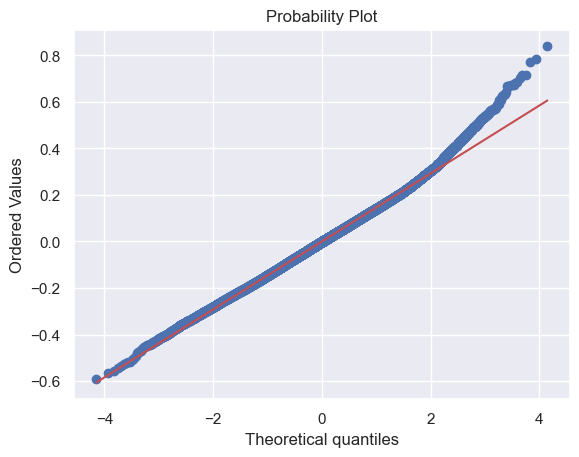

In [21]:
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(residuals1, dist="norm", plot=pylab)
pylab.show()

The residuals are quite Normally distributed as we log-transformmed  beforehand to normalise our dataset.

<B><H3>2. Polynomial Regression Analysis:</B></H3>

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X2_poly = poly_reg.fit_transform(X2_train)
regressor2 = LinearRegression()
regressor2.fit(X2_poly, y2_train)

LinearRegression()

In [24]:
y_pred2 = regressor2.predict(poly_reg.transform(X2_test))
r2_poly=r2_score(y2_test, y_pred2)
print("R2 :", r2_poly)
     
     

R2 : 0.7200786922437841


<B><H3>3. Decision Tree Regression:</B></H3>

In [25]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 0)
regressor3.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [26]:
y_pred3 = regressor3.predict(X2_test)
r2_dtr=r2_score(y2_test, y_pred3)
print("R2 :" ,r2_dtr)

R2 : 0.8609116847940297


<B><H3>4.  Random Forest Regression:</B></H3>



In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor4.fit(X2_train, y2_train)
     

RandomForestRegressor(n_estimators=500, random_state=0)

In [28]:
y_pred4 = regressor4.predict(X2_test)
r2_rfr=r2_score(y2_test, y_pred4)
print("R2 :" ,r2_rfr)


R2 : 0.9177769067987562


<B><H3>5. XGBoost Regression:</B></H3>

In [29]:
!pip install xgboost

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Instantiate XGBoost regressor
regressor5 = xgb.XGBRegressor(objective='reg:squarederror', seed=42,n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)

# Fit the model
regressor5.fit(X2_train, y2_train)

# Predict on the test set
y_pred5 = regressor5.predict(X2_test)

# Calculate mean squared error
mse = mean_squared_error(y2_test, y_pred5)
print(f"Mean Squared Error: {mse}")
r2_xgb=r2_score(y2_test, y_pred5)
print("R2 :" ,r2_xgb)

Mean Squared Error: 0.005763872120335763
R2 : 0.8895855018343175


The model that gives the best result is the Random Forest with on the test dataset an R^2 score equals to 0.917. However later,we will use the hyperparameter tuning method to get a improved performance of the model.

# Feature Importance of Random forest Regression:

In [31]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X2, y2)
print(selection.feature_importances_)


feature_importance=regressor4.feature_importances_
feature_importance
     





pd.Series(selection.feature_importances_, index=X2.columns)
     

[1.15552111e-01 0.00000000e+00 1.13471610e-01 4.43255368e-01
 4.11270339e-02 2.12553961e-02 2.11444311e-02 1.74461816e-02
 5.19598785e-02 1.15770083e-02 1.01608960e-02 8.88708577e-03
 2.15033566e-02 1.34895997e-02 9.22516987e-03 9.23106311e-03
 1.06498583e-02 1.86228422e-02 1.12357297e-02 6.17938400e-03
 6.19986366e-03 2.90770294e-04 8.32527379e-03 4.89628504e-03
 2.58473707e-03 7.95560135e-03 2.50875309e-03 4.81506726e-03
 6.44964522e-03]


stops                           0.115552
class                           0.000000
duration                        0.113472
days_left                       0.443255
airline_Air_India               0.041127
airline_GO_FIRST                0.021255
airline_Indigo                  0.021144
airline_SpiceJet                0.017446
airline_Vistara                 0.051960
source_city_Chennai             0.011577
source_city_Delhi               0.010161
source_city_Hyderabad           0.008887
source_city_Kolkata             0.021503
source_city_Mumbai              0.013490
destination_city_Chennai        0.009225
destination_city_Delhi          0.009231
destination_city_Hyderabad      0.010650
destination_city_Kolkata        0.018623
destination_city_Mumbai         0.011236
departure_time_Early_Morning    0.006179
departure_time_Evening          0.006200
departure_time_Late_Night       0.000291
departure_time_Morning          0.008325
departure_time_Night            0.004896
arrival_time_Ear

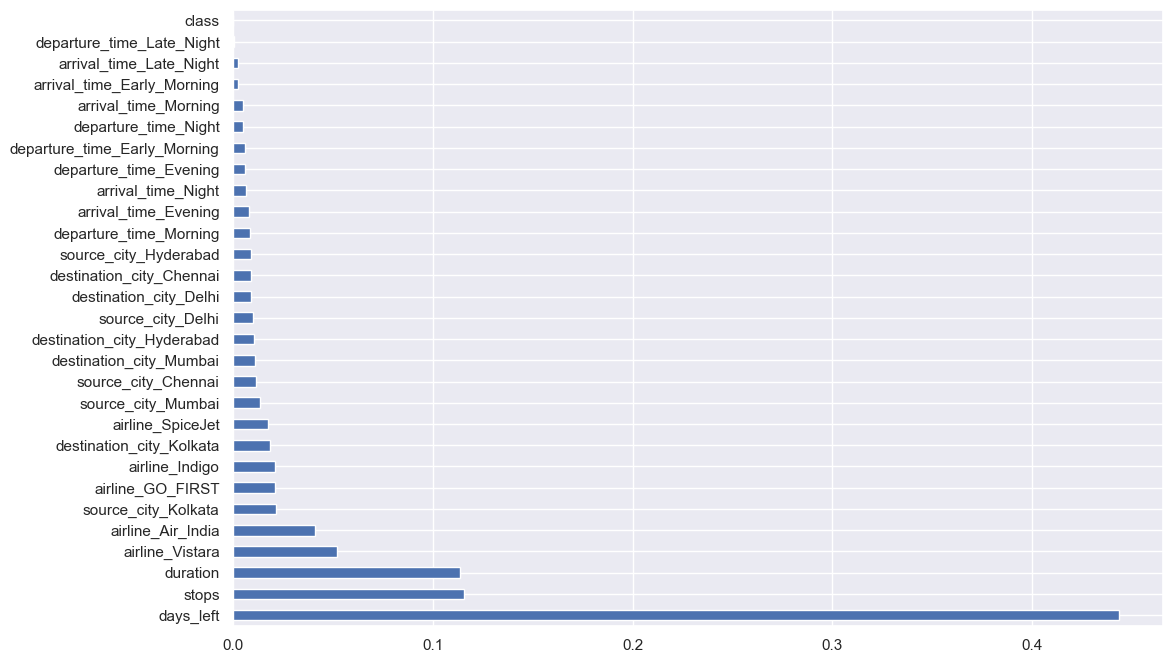

In [32]:
#plot graph of feature importances for better visualization

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X2.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

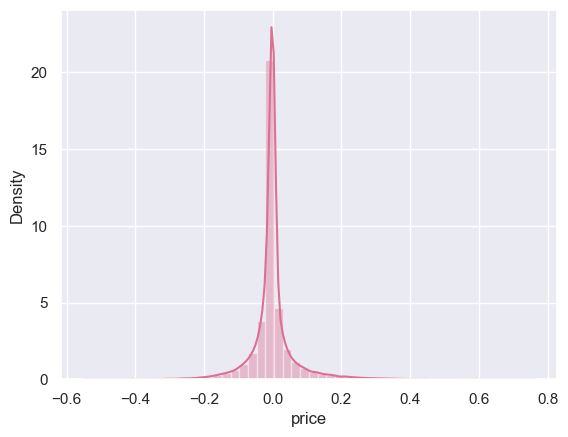

In [47]:
#Dist plot of the Random Forest Regressor
sns.distplot(y2_test-y_pred4,color='palevioletred')
plt.show()

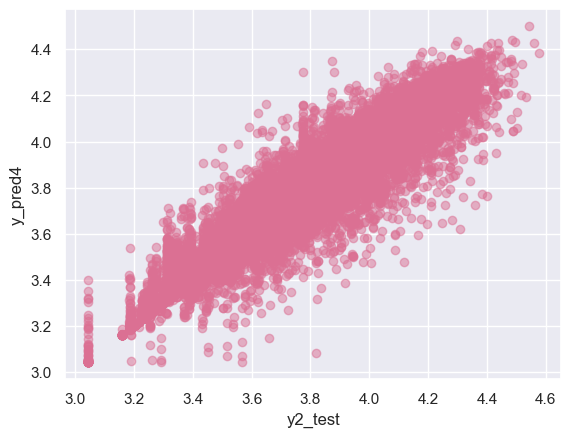

In [48]:
#Scatter plot of predicted values and actual test data on the basis of Random forest Regressor
plt.scatter(y2_test, y_pred4,color='palevioletred', alpha = 0.5)
plt.xlabel("y2_test")
plt.ylabel("y_pred4")
plt.show()

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y2_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred4)))

MAE: 0.033814711308744444
MSE: 0.004292220699488868
RMSE: 0.06551504178041


# Hyperparameter Tuning
* Choose following method for hyperparameter tuning
  
     <B>1.RandomizedSearchCV</B> --> Fast
               
    <B> 2.GridSearchCV</B>
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [36]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [37]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [38]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator =regressor4 , param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [39]:
rf_random.fit(X2_train,y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  58.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  58.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.0min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.7min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.7min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=500,
                                                   random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
#Finding the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

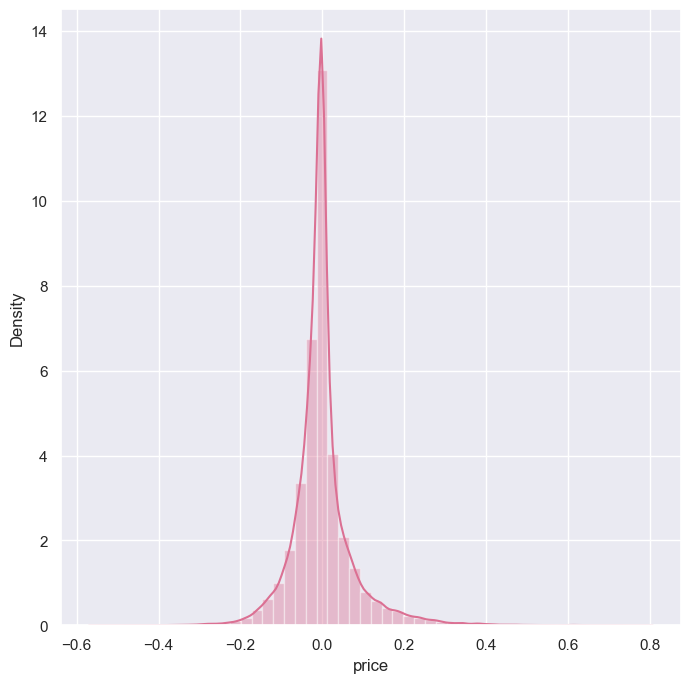

R2 : 0.8932247832956689


In [51]:
#Estimating the r^2 score after getting the best parameters of Random Forest Model
prediction = rf_random.predict(X2_test)
plt.figure(figsize = (8,8))

#Plotting the Distribution of price
sns.distplot(y2_test-prediction,color='palevioletred')
plt.show()


r2_rfmodel=r2_score(y2_test, prediction)
print("R2 :" ,r2_rfmodel)
     

# Inferences:

<H3> Challenges we have faced:</H3>

* Our main dataset was bimodal in nature ,so we separated the dataset into two classes ; business and economy class.

* Economoy dataset was normally distributed but business class dataset was skewed ,so we transformed the data into normalise our data distribution.

* In our set of features, severals variables have moderate Multicoliearity which may be a result of sample phenomenon of Multicolinearity, as we have only 300153 observations in our dataset.If we add some more data then we may get more accuracy.

<B><H2>  Conclusion:</B></H2>


* Random Forest Regressor is the best fit model for this dataset and Days_left has the highest impact on economy class flight cost.
* So it is clearly found that 'class' is the major factor on the prediction of Flight Price;because there is a big gap between flight tickets in business and economy class.
* Apart from class, AirIndia and Vistara seems to be the most expensive companies. However for economy tickets, all airline companies are  more or less significant and Vistara is slightly more important feature than AirIndia.
* In general, the more stops there are, the more expensive the flight ticket is.
* Stops and duration are the two main important features to predict the price of flight tickets. And more than these two, days_left have a significant role in prediction of flight price in economy class.
* The longer the flight is the more expensive the tickets are until it reaches around 20 hours, then the prices tend to decrease.
* Kolkata is the most important city in both the cases of arrival and destination city in comparison to the other cities for economy class tickets.
* In case of Flight timing,most of the people prefers to reach their destination in evening rather than early morning or any other time and the picture shows that least significant feature is the late night arrival/departure time of the flight.
* In general, prices rise quite slowly until 20 days before the flight where the prices rise drastically. But one day before the flight, there usually are empty seats that have not been sold. Thus it is possible to find tickets three times cheaper than the day before.  

   
   






<B>THANK YOU</B>